# Imports

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Constants

In [6]:
INPUT_WIDTH = 150
INPUT_HEIGHT = 150
img_input = layers.Input(shape=(INPUT_WIDTH, INPUT_HEIGHT, 3))

train_dir = 'train'
validation_dir = 'validation'

train_0_dir = os.path.join(train_dir, '0')
train_1_dir = os.path.join(train_dir, '1')

validation_0_dir = os.path.join(validation_dir, '0')
validation_1_dir = os.path.join(validation_dir, '1')

# Configure Model

In [7]:
# Each convolution extracts 3x3 filters and is followed by a max-pooling layer with a 2x2 window
# First convolution extracts 16 filters
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map in order to add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden nodes
x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model
model = Model(img_input, output)

# Configure training specifications
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Data Preprocessing

In [8]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 92 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


# Train Model

In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=9,  # 2000 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=2,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/30
9/9 - 3s - loss: 1.8292 - acc: 0.5000 - val_loss: 0.7820 - val_acc: 0.5500
Epoch 2/30
9/9 - 3s - loss: 0.7024 - acc: 0.5976 - val_loss: 0.6841 - val_acc: 0.5500
Epoch 3/30
9/9 - 3s - loss: 0.7026 - acc: 0.5000 - val_loss: 0.6893 - val_acc: 0.5500
Epoch 4/30
9/9 - 3s - loss: 0.7261 - acc: 0.5610 - val_loss: 0.6928 - val_acc: 0.5500
Epoch 5/30
9/9 - 3s - loss: 0.6823 - acc: 0.5976 - val_loss: 0.6900 - val_acc: 0.5500
Epoch 6/30
9/9 - 3s - loss: 0.6833 - acc: 0.5244 - val_loss: 0.7975 - val_acc: 0.5500
Epoch 7/30
9/9 - 3s - loss: 0.7350 - acc: 0.5333 - val_loss: 0.6905 - val_acc: 0.5500
Epoch 8/30
9/9 - 2s - loss: 0.7165 - acc: 0.5811 - val_loss: 0.6973 - val_acc: 0.5500
Epoch 9/30
9/9 - 3s - loss: 0.7029 - acc: 0.5444 - val_loss: 0.6954 - val_acc: 0.5500
Epoch 10/30
9/9 - 3s - loss: 0.6715 - acc: 0.5854 - val_loss: 0.9419 - val_acc: 0.5500
Epoch 11/30
9/9 - 3s - loss: 0.7135 - acc: 0.5976 - val_loss: 0.7054 - val_acc: 0.5500
Epoch 12/30
9/9 - 3s - loss: 0.7000 - acc: 0.5122 - 

# Visualize Accuracy and Loss

Text(0.5, 1.0, 'Training and validation loss')

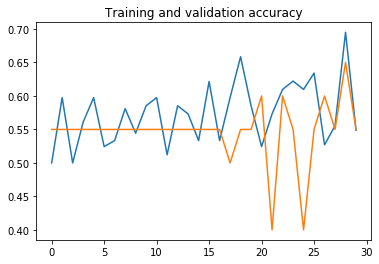

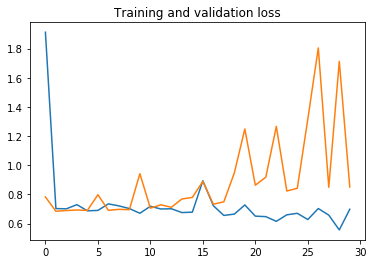

In [10]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

%matplotlib inline

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')